### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
cleaned = data.drop('car', axis=1)
cleaned = cleaned.fillna('never')
cleaned.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [7]:
len(cleaned[cleaned['Y'] == 1]) / len(cleaned)

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot: >

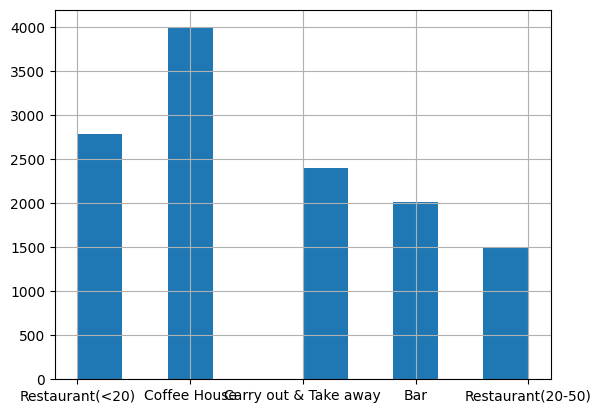

In [8]:
cleaned['coupon'].hist()

6. Use a histogram to visualize the temperature column.

([<matplotlib.axis.XTick at 0x1b3516e9850>,
 [Text(30, 0, '30'), Text(55, 0, '55'), Text(80, 0, '80')])

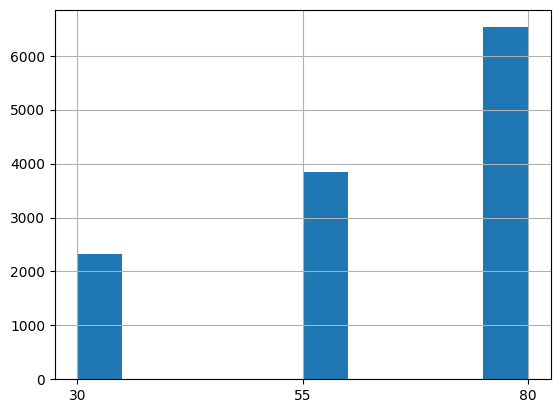

In [9]:
cleaned['temperature'].hist()
plt.xticks([30, 55, 80])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar = cleaned[cleaned['coupon'] == 'Bar']
bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [11]:
len(bar[bar['Y'] == 1]) / len(bar)

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
less3 = bar[bar['Bar'].isin(['never', 'less1', '1~3'])]
more3 = bar[bar['Bar'].isin(['4~8', 'gt8'])]
print("Acceptance rate of those who went 3 times or less:", len(less3[less3['Y'] == 1]) / len(less3))
print("Acceptance rate of those who went more than 3 times:", len(more3[more3['Y'] == 1]) / len(more3))

Acceptance rate of those who went 3 times or less: 0.37073707370737075
Acceptance rate of those who went more than 3 times: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
over25 = bar.query("Bar in ['1~3', '4~8', 'gt8'] and age not in ['21', 'below21']")
others = bar.query("Bar in ['1~3', '4~8', 'gt8']")
print("Acceptance rate of drivers over 25 who go more than once a month:", len(over25[over25['Y'] == 1]) / len(over25))
print("Acceptance rate of all drivers who go more than once a month:", len(others[others['Y'] == 1]) / len(others))
print()
print("""There is only a slight difference, which means that whether a driver is over 25 is a strong indicator of
how likely they are to accept the coupon if they go more than once a month""")

Acceptance rate of drivers over 25 who go more than once a month: 0.6952380952380952
Acceptance rate of all drivers who go more than once a month: 0.6879194630872483

There is only a slight difference, which means that whether a driver is over 25 is a strong indicator of
how likely they are to accept the coupon if they go more than once a month


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [24]:
nokids = bar.query("Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)'")
occ = bar.query("Bar in ['1~3', '4~8', 'gt8'] and occupation != 'Farming Fishing & Forestry'")
print("Acceptance rate of drivers who go more than once a month without kids:", len(nokids[nokids['Y'] == 1]) / len(nokids))
print("Acceptance rate of drivers who go more than once a month and aren't in Farming, Fishing & Forestry:", len(occ[occ['Y'] == 1]) / len(occ))
print()
print("""Not having a job in Farming, Fishing & Forestry COULD be indicative of whether they will go
more than once a month without kids, but it's uncertain.""")

Acceptance rate of drivers who go more than once a month without kids: 0.7132486388384754
Acceptance rate of drivers who go more than once a month and aren't in Farming, Fishing & Forestry: 0.6879194630872483

Not having a job in Farming, Fishing & Forestry COULD be indicative of whether they will go
more than once a month without kids, but it's uncertain.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [34]:
notwidow = bar.query("Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)' and maritalStatus != 'Widowed'")
under30 = bar.query("Bar in ['1~3', '4~8', 'gt8'] and age in ['21', '26', 'below21']")
cheapR = cleaned.query("RestaurantLessThan20 in ['4~8', 'gt8'] and income in ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']")
print("Acceptance rate of drivers who go to bars more than once a month without kids and aren't widowed:", len(notwidow.query("Y == 1")) / len(notwidow))
print("Acceptance rate of drivers under 30 who go more than once a month:", len(under30.query("Y == 1")) / len(under30))
print("Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and make less than $50k:", len(cheapR.query("Y == 1")) / len(cheapR))
print()
print("""Not having kids and being young seem to correlate with accepting the coupons. 
Income is also a likely contributing factor to the decision.""")

Acceptance rate of drivers who go to bars more than once a month without kids and aren't widowed: 0.7132486388384754
Acceptance rate of drivers under 30 who go more than once a month: 0.7217391304347827
Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and make less than $50k: 0.6007020623080298

Not having kids and being young seem to correlate with accepting the coupons. 
Income is also a likely contributing factor to the decision.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<mark>Answer:</mark> Whether a driver is over 25 is a strong indicator of how likely they are to accept the coupon if they go more than once a month. Not having a job in Farming, Fishing & Forestry COULD be indicative of whether they will go more than once a month without kids, but it's uncertain. Not having kids and being young seem to correlate with accepting the coupons. Income is also a likely contributing factor to the decision.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### A dataframe of those who got a coupon for cheap restaurants

In [37]:
cheap = cleaned[cleaned['coupon'] == 'Restaurant(<20)']
cheap

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1


#### Correlation Between Income and Coupon Acceptance
Here, I sought to find out which income levels had the highest acceptance rates.

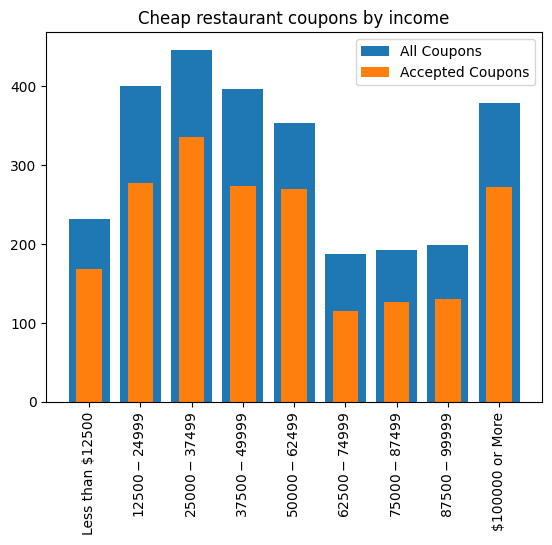

In [98]:
# Compute incomes and their associated counts
income_list = sorted(cheap['income'].value_counts().keys())
temp = income_list[0]
income_list[0] = income_list[-1]
income_list[-1] = temp
vals = cheap['income'].value_counts().to_numpy()
keys = cheap['income'].value_counts().index.to_list()
dic = {k:v for (k,v) in zip(keys,vals)}
vals_list = [dic[x] for x in income_list]
plt.bar(income_list, vals_list)
plt.xticks(rotation=90)

# Compute how many of the coupons were accepted
accepted = cheap.query("Y == 1")
acc_vals = accepted['income'].value_counts().to_list()
dic2 = {k:v for (k,v) in zip(keys,acc_vals)}
acc_list = [dic2[x] for x in income_list]
plt.bar(income_list, acc_list, width=0.5)
plt.title("Cheap restaurant coupons by income")
plt.legend(["All Coupons", "Accepted Coupons"])

#### Correlation Between Distance to Coupon and Acceptance
Here, I sought to observe the trend of acceptance as the distance to the coupon location increased.

In [104]:
print("Total number of accepted coupons:", len(cheap.query("Y == 1")))
print("Number of acceptances at a distance of 5 minutes or more:", len(cheap.query("Y == 1 and toCoupon_GEQ5min == 1")))
print("Number of acceptances at a distance of 15 minutes or more:", len(cheap.query("Y == 1 and toCoupon_GEQ15min == 1")))
print("Number of acceptances at a distance of 25 minutes or more:", len(cheap.query("Y == 1 and toCoupon_GEQ25min == 1")))

Total number of accepted coupons: 1970
Number of acceptances at a distance of 5 minutes or more: 1970
Number of acceptances at a distance of 15 minutes or more: 810
Number of acceptances at a distance of 25 minutes or more: 101


#### Correlation Between Destination and Acceptance
Grouping accepted coupons by the destination the driver was headed.

Text(0.5, 1.0, 'Coupon Acceptance by Destination')

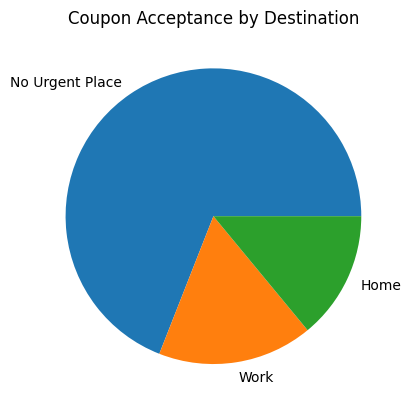

In [109]:
sizes = [len(cheap.query("Y == 1 and destination == 'No Urgent Place'")), len(cheap.query("Y == 1 and destination == 'Work'")), len(cheap.query("Y == 1 and destination == 'Home'"))]
labels = ["No Urgent Place", "Work", "Home"]
plt.pie(sizes, labels=labels)
plt.title("Coupon Acceptance by Destination")

# Findings
The Question: What are the characteristics of drivers who received coupons for cheap restaurants?
To gauge these characteristics, I looked into the income level, distance, and destination.

## Income Level
I decided to look into the income level because I thought that people receiving coupons for cheap restaurants might be frequenting these venues on their own time since they cannot afford to dine at expensive restaurants.

<mark> I used an overlapping bar chart to compare the number of accepted coupons to all given coupons, grouped by income level.</mark>

The highest acceptances occurred for people whose incomes fell between $12,500 and $62,500. This fell in line with my initial assumption. However, there was also a high acceptance rate for people who had an income of $100,000 or more. I was surprised to see this, since it seemed like outlying data compared to the section of income that supported my assumption. I didn't assume that people with a high income would still be willing to dine at cheap restaurants.

## Distance
I decided to look into the correlation between distance and acceptance, since I assumed that people would be less likely to accept a coupon if it was too far away.

<mark>I computed the number of acceptances for each of the distance features provided within the dataset.</mark>

In line with my assumption, distance and acceptance have an inverse relationship. The number of acceptances decreases as the distance increases.

## Destination
I decided to look into the destination of the drivers since the urgency of their drive could affect whether they are willing to take a detour.

<mark>I used a pie chart to demonstrate the size of each destination category in relation to the others.</mark>

The most acceptances occurred when drivers had no urgent destination. The least acceptances occurred when drivers were headed home. This could be attributed to a number of different factors. Perhaps they already had food at home or were on their way to make some, or they were too tired to eat outside and just wanted to get home. This is an aspect of the data that we cannot prove with the data that we have.

## Next Steps
The investigation of this coupon type is far from complete. In the future, I would look into combining a few features at once. I would also include other columns such as visit frequency, direction, and whether they have kids or are in a relationship (anything that would increase the number of people in their household).